In [116]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [115]:
# 데이터를 불러오면서 리뷰 열만 가져오기
data = pd.read_csv('./data/similar_data', encoding='ANSI')
data_review = data.REVIEW

In [77]:
a = input('리뷰를 입력하세요: ')
print(a)

리뷰를 입력하세요: 눈이 즐겁다..
눈이 즐겁다..


In [93]:
len(data_review)

7280

In [117]:
# 필요없는데 label에서의 긍/부정 비율만 확인하고자 넣은 것...
data['label'] = np.select([data.star > 3], [1], default=0)
data.head()

,DATE,REVIEW,star,label
0,2021-03-11,과금자로서 그래픽등 모든게 마음에 드는데 단 마음에 안드는부분..지금멀티에어 수동과...,5,1
1,2021-03-12,음.. 게임에 과금요소 있는거 좋아요 게임회사도 먹고살아야하니깐.. 근데 차한대에 ...,1,0
2,2021-02-24,저 이거 3년반차데 와.... 차구하는것도 겁나 싸고 그리고 차도 너무 멋지고 1등...,5,1
3,2021-02-17,제가 예전에 게임 다운이 오래걸린다고 실망했다는 글을 썼었는데 완전 잘못쓴 글이었네...,5,1
4,2021-03-01,"게임 내 모든 것에 만족합니다. 클럽, 설계도, 패스, 그래픽 등등 모든것에 만족하...",5,1


<AxesSubplot:>

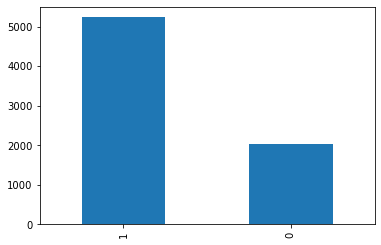

In [118]:
data['label'].value_counts().plot(kind = 'bar')

In [119]:
print(data.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0   2043
1      1   5237


In [121]:
# 맨 마지막 행에 입력한 리뷰를 넣기
data.loc[len(data_review)] = a
print(len(data))
print(data.tail(10))

7281
            DATE                    REVIEW      star     label
7271  2020-06-26                 심플해뎌서 좋다.         5         1
7272  2019-01-09               설계도 모으기 힘드네         3         0
7273  2020-05-13              차 얻기 너무 힘들어요         5         1
7274  2020-09-11         아스팔트 8 에이본 보다 어렵다         5         1
7275  2019-06-19  치터들 좀 잡아라 니들 그러다 베그 꼴 난다         1         0
7276  2018-10-07                  눈이 즐겁다..         5         1
7277  2020-09-12             게임이 안깔린다 ㅃㅃㅃㅃ         1         0
7278  2020-10-01                레전드 없으면 망함         5         1
7279  2018-10-13                게임 자체가 않깔림         1         0
7280    눈이 즐겁다..                  눈이 즐겁다..  눈이 즐겁다..  눈이 즐겁다..


In [122]:
data['REVIEW'].duplicated().sum()

23

In [123]:
data.drop_duplicates('REVIEW', keep="first", inplace=True)
data['REVIEW'].duplicated().sum()
print(len(data))

7258


In [124]:
data.reset_index(inplace=True)
print(len(data))
print(data.tail(10))

7258
      index        DATE                    REVIEW star label
7248   7270  2020-01-10      아직은 할만하네 좀 더 진행보겠습니다    4     1
7249   7271  2020-06-26                 심플해뎌서 좋다.    5     1
7250   7272  2019-01-09               설계도 모으기 힘드네    3     0
7251   7273  2020-05-13              차 얻기 너무 힘들어요    5     1
7252   7274  2020-09-11         아스팔트 8 에이본 보다 어렵다    5     1
7253   7275  2019-06-19  치터들 좀 잡아라 니들 그러다 베그 꼴 난다    1     0
7254   7276  2018-10-07                  눈이 즐겁다..    5     1
7255   7277  2020-09-12             게임이 안깔린다 ㅃㅃㅃㅃ    1     0
7256   7278  2020-10-01                레전드 없으면 망함    5     1
7257   7279  2018-10-13                게임 자체가 않깔림    1     0


In [125]:
data_review = data['REVIEW']
data_review.tail()

7253    치터들 좀 잡아라 니들 그러다 베그 꼴 난다
7254                    눈이 즐겁다..
7255               게임이 안깔린다 ㅃㅃㅃㅃ
7256                  레전드 없으면 망함
7257                  게임 자체가 않깔림
Name: REVIEW, dtype: object

In [126]:
tfidf = TfidfVectorizer()
# 리뷰 데이터에 대해서 tf-idf 수행
tfidf_matrix = tfidf.fit_transform(data_review)
print(tfidf_matrix.shape)
# 29279의 데이터에서 119491개의 단어가 사용됨을 알 수 있음

(7258, 25156)


In [127]:
# 코사인 유사도 함수 입력
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [128]:
# 중복을 제거하면서 리뷰내용을 인덱스로, 기존 인덱스를 본문 데이터로 이동
# 이는 리뷰를 입력하면 인덱스를 출력하기 위함
indices = pd.Series(data_review.index, index=data_review).drop_duplicates()
indices.head()

REVIEW
과금자로서 그래픽등 모든게 마음에 드는데 단 마음에 안드는부분..지금멀티에어 수동과자동이 같이 플레이어 하는데 빠른시일내에 멀티플레이어에서 자동과수동 따로 패치해주시기 바랍니다..디코에도 수차레 의견을 올린것으로 아는데 언제 실행 해주실건가요? 멀티에서 수동유저들 한테 일부러 자동을 파손시켜 스트레스받아 멀티 못하겠습니다 ...제발요ㅜㅠ    0
음.. 게임에 과금요소 있는거 좋아요 게임회사도 먹고살아야하니깐.. 근데 차한대에 꽂혀서 큰돈 아니지만 5만원 질러서 카드를 다 모았다? 근데 차키가 필요하대.. 하하하 이럴줄알았으면 그냥 안지를걸ㅎㅎ 차는 차대로 날라가고 돈은 돈대로쓰고 내가 이벤트 이해못한거 인정하는데 솔찍히 현타와서 접을거같음ㅋㅋㅋㄲㅋ                     1
저 이거 3년반차데 와.... 차구하는것도 겁나 싸고 그리고 차도 너무 멋지고 1등하는 것 쉽고 하는 것도 간단하고 재밌고 좋은 겜이라고 생각합니다!! 앞으로도 열심히 업데이트 많이 해주세요!그리고 코로나 시대 최고의 게임이라고 생각합니다!! 저에 최고의 게임이 돼주셔서 감사합니다!!화이팅!!                             2
제가 예전에 게임 다운이 오래걸린다고 실망했다는 글을 썼었는데 완전 잘못쓴 글이었네요. 플레이해보니 왜 다운이 오래걸리는지 이해가 됩니다. 그래픽은 말할것도 없이 최고고 차량도 굉장히 다양하네요. 레이싱에서 쇼크웨이브 쓰면 쾌감이 장난아니에요. 다시한번 최고입니다. 멋진게임 많이 만들어주세요!                             3
게임 내 모든 것에 만족합니다. 클럽, 설계도, 패스, 그래픽 등등 모든것에 만족하지만 그래픽 부분에 안티 앨리어싱이 제대로 되지 않더라고요.. 안티앨리어싱만 좀 고쳐주시면 좋을거같습니다^^ 안티앨리어싱 반영부탁드립니다. 감사합니다!.                                                              4
dtype: int64

In [129]:
# 위의 내용을 바탕으로 코사인 유사도 함수식을 작성
def get_recommendations(review, cosine_sim=cosine_sim):
    # 입력한 리뷰로부터 해당되는 인덱스를 받아옴. 이제 선택한 리뷰를 가지고 연산
    idx = indices[review]

    # 모든 리뷰에 대해서 해당 리뷰와의 유사도를 구함
    sim_scores = list(enumerate(cosine_sim[idx]))

    # 유사도에 따라 리뷰들을 정렬
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
#     sim_scores = sorted(sim_scores, reverse=True)

    # 가장 유사한 10개의 리뷰를 받음
    sim_scores = sim_scores[1:11]

    # 가장 유사한 10개의 리뷰의 인덱스를 받음
    review_indices = [i[0] for i in sim_scores]

    # 가장 유사한 10개의 리뷰를 리턴
    return data_review.iloc[review_indices]

In [130]:
# 입력된 리뷰를 유사도 함수에 넣기
get_recommendations(a)

2740                               눈이 즐겁다. 하지만 현질유도가 심하다.
5107                                         그래픽에 눈이 즐겁네요
2152                모바일 게임이라곤 놀라울만큼 발전한 그래픽, 눈이 아주 즐겁습니다!
1774    레이싱 게임에서 운전을 안하는데 재밌기는 처음이네요 ㅋㅋ BGM과 눈이 즐거운 게임...
1478    걍 그거임 8이 헬적이 너무 심하게되서 9하는거고 하다보니 9가 더 잼긴함 다만 얘...
707     일단 핸들링이 오토라서 좋다 아스팔트8때는 속도 조금 빠르다하면 박고 차 박살났는데...
0       과금자로서 그래픽등 모든게 마음에 드는데 단 마음에 안드는부분..지금멀티에어 수동과...
1       음.. 게임에 과금요소 있는거 좋아요 게임회사도 먹고살아야하니깐.. 근데 차한대에 ...
2       저 이거 3년반차데 와.... 차구하는것도 겁나 싸고 그리고 차도 너무 멋지고 1등...
3       제가 예전에 게임 다운이 오래걸린다고 실망했다는 글을 썼었는데 완전 잘못쓴 글이었네...
Name: REVIEW, dtype: object

In [141]:
result = get_recommendations(a)

In [144]:
result = result.to_list()

In [145]:
m = result

In [130]:
# 원활한 html 값 추출을 위해 시리즈 타입인 result를 리스트 타입으로 변환
## 필요없으면 삭제해도 무방
# result = result.to_list()
k = result[1]

In [150]:
print(m[3])
print(k[2])

계정 복구 해주세요
음.. 게임에 과금요소 있는거 좋아요 게임회사도 먹고살아야하니깐.. 근데 차한대에 꽂혀서 큰돈 아니지만 5만원 질러서 카드를 다 모았다? 근데 차키가 필요하대.. 하하하 이럴줄알았으면 그냥 안지를걸ㅎㅎ 차는 차대로 날라가고 돈은 돈대로쓰고 내가 이벤트 이해못한거 인정하는데 솔찍히 현타와서 접을거같음ㅋㅋㅋㄲㅋ
